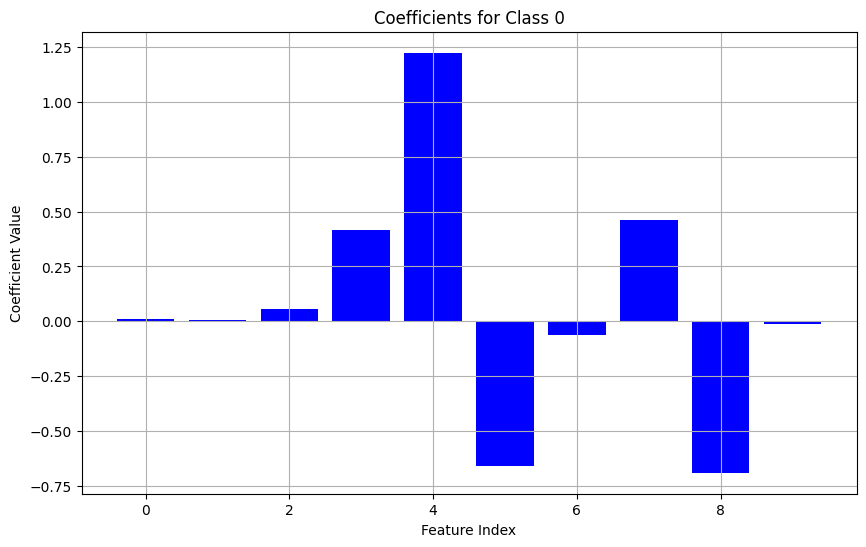

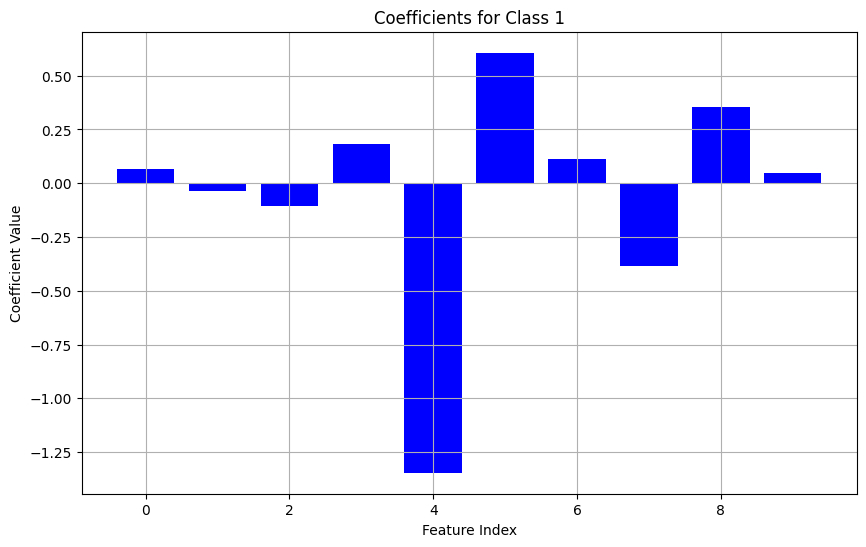

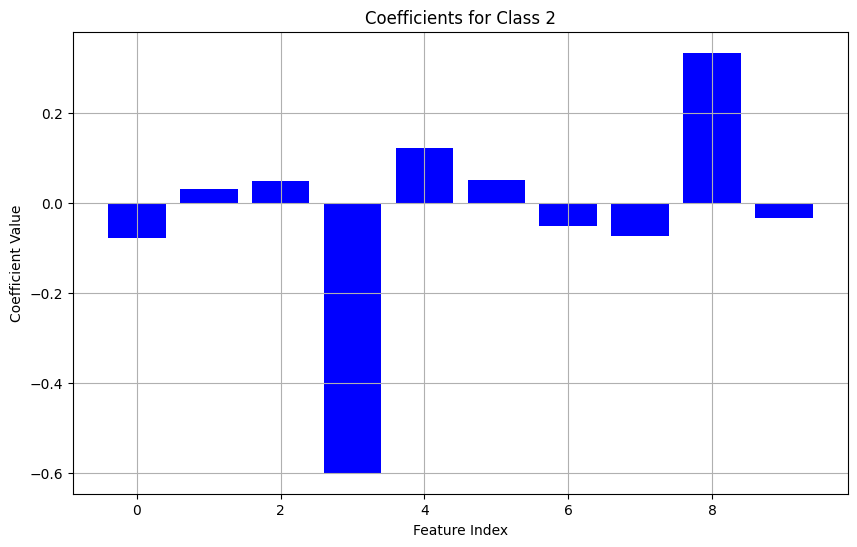

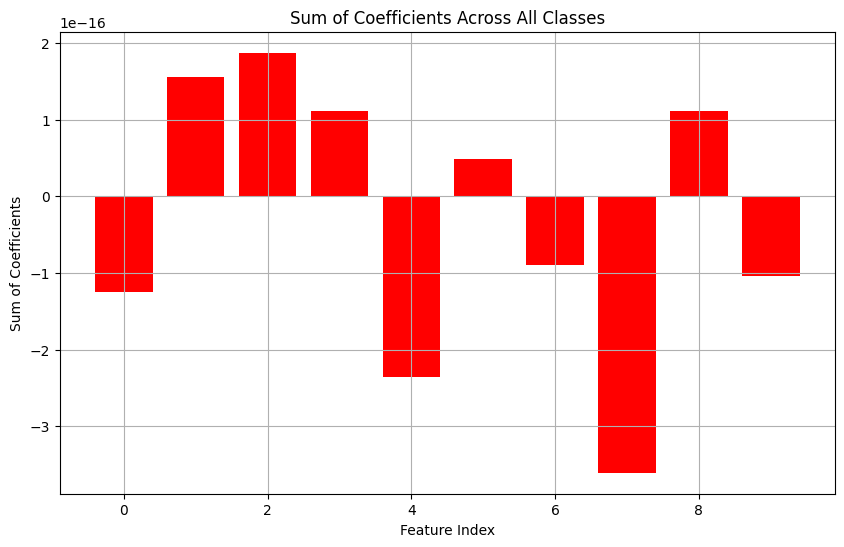

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_informative=5, n_redundant=0, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Fit a multinomial logistic regression model with L2 regularization
model = LogisticRegression(multi_class='multinomial', penalty='l2', solver='lbfgs', C=1.0, max_iter=10000)
model.fit(X, y)

# Extract the learned parameters
W = model.coef_

# Calculate the sum of the weights for each feature across all classes
W_sum = np.sum(W, axis=0)

# Plot the coefficients for each class separately
for i, class_coef in enumerate(W):
    plt.figure(figsize=(10, 6))
    plt.bar(range(X.shape[1]), class_coef, color='blue')
    plt.xlabel('Feature Index')
    plt.ylabel('Coefficient Value')
    plt.title(f'Coefficients for Class {i}')
    plt.grid(True)
    plt.savefig(f'class_{i}_coefficients.png')
    plt.show()

# Plot the sum of the weights for each feature across all classes
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), W_sum, color='red')
plt.xlabel('Feature Index')
plt.ylabel('Sum of Coefficients')
plt.title('Sum of Coefficients Across All Classes')
plt.grid(True)
plt.savefig('sum_of_coefficients.png')
plt.show()
